# SuperStore Sales Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [177]:
sales_df = pd.read_csv(r'C:\Users\saram\OneDrive\Desktop\Sales Prediction\Superstore 2023.csv')

In [178]:
sales_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2020-152156,08/11/2022 00:00:00,11/11/2020,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2020-152156,08/11/2022 00:00:00,11/11/2020,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2020-138688,12/06/2022 00:00:00,16/06/2020,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2019-108966,11/10/2021 00:00:00,18/10/2019,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2019-108966,11/10/2021 00:00:00,18/10/2019,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [179]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          9994 non-null   int64  
 1   Order ID        9994 non-null   object 
 2   Order Date      9994 non-null   object 
 3   Ship Date       9994 non-null   object 
 4   Ship Mode       9994 non-null   object 
 5   Customer ID     9994 non-null   object 
 6   Customer Name   9994 non-null   object 
 7   Segment         9994 non-null   object 
 8   Country/Region  9994 non-null   object 
 9   City            9994 non-null   object 
 10  State           9994 non-null   object 
 11  Postal Code     9983 non-null   float64
 12  Region          9994 non-null   object 
 13  Product ID      9994 non-null   object 
 14  Category        9994 non-null   object 
 15  Sub-Category    9994 non-null   object 
 16  Product Name    9994 non-null   object 
 17  Sales           9994 non-null   f

In [180]:
#drop column Row ID
sales_df = sales_df.drop(columns=['Row ID'])

In [181]:
#check missing values
sales_df.isnull().sum()

Order ID           0
Order Date         0
Ship Date          0
Ship Mode          0
Customer ID        0
Customer Name      0
Segment            0
Country/Region     0
City               0
State              0
Postal Code       11
Region             0
Product ID         0
Category           0
Sub-Category       0
Product Name       0
Sales              0
Quantity           0
Discount           0
Profit             0
dtype: int64

In [182]:
#view missing values in Postal Code
sales_df[sales_df['Postal Code'].isnull()]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2234,CA-2021-104066,05/12/2023 00:00:00,10/12/2021,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03,7,0.0,67.6599
5274,CA-2019-162887,07/11/2021 00:00:00,09/11/2019,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20,3,0.0,178.8000
8798,US-2020-150140,06/04/2022 00:00:00,10/04/2020,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75,5,0.0,336.6350
9146,US-2020-165505,23/01/2022 00:00:00,27/01/2020,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98,2,0.0,42.9914
9147,US-2020-165505,23/01/2022 00:00:00,27/01/2020,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04,6,0.0,2.7336
9148,US-2020-165505,23/01/2022 00:00:00,27/01/2020,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29,13,0.0,406.7154
9386,US-2021-127292,19/01/2023 00:00:00,23/01/2021,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92,4,0.0,37.5624
9387,US-2021-127292,19/01/2023 00:00:00,23/01/2021,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28,1,0.0,5.7716
9388,US-2021-127292,19/01/2023 00:00:00,23/01/2021,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94,3,0.0,152.0232
9389,US-2021-127292,19/01/2023 00:00:00,23/01/2021,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04,1,0.0,0.9588


We will add the postecode for the city. The postcode is 05401

In [183]:
#fill missing values
sales_df['Postal Code'] = sales_df['Postal Code'].fillna(5401.0)

In [184]:
sales_df['Postal Code'].isnull().sum()

0

We need to change the type for the columns. 

In [185]:
#change the type of Date columns
from datetime import datetime
def convert_data_fromat(date_string):
    date_obj = datetime.strptime(date_string,'%d/%m/%Y %H:%M:%S')
    new_format = date_obj.strftime('%Y-%m-%d')
    return new_format


In [186]:
sales_df['Order Date'] = sales_df['Order Date'].apply(convert_data_fromat)

In [187]:
def convert_datatime(date_string):
    date_obj = datetime.strptime(date_string,'%d/%m/%Y')
    new_format = date_obj.strftime('%Y-%m-%d')
    return new_format

In [188]:
sales_df['Ship Date'] = sales_df['Ship Date'].apply(convert_datatime)

In [189]:
sales_df['Order Date'] = pd.to_datetime(sales_df['Order Date'])
sales_df['Ship Date'] = pd.to_datetime(sales_df['Ship Date'])

In [190]:
sales_df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2020-152156,2022-11-08,2020-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2020-152156,2022-11-08,2020-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2020-138688,2022-06-12,2020-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2019-108966,2021-10-11,2019-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2019-108966,2021-10-11,2019-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [194]:
sales_df['Order Date'] = sales_df.apply(lambda row: row['Order Date'].replace(year=row['Ship Date'].year), axis=1)

In [195]:
sales_df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2020-152156,2020-11-08,2020-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2020-152156,2020-11-08,2020-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2020-138688,2020-06-12,2020-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2019-108966,2019-10-11,2019-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2019-108966,2019-10-11,2019-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [82]:
sales_df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country/Region', 'City',
       'State', 'Postal Code', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

We clean the data and now is ready to start with analysing. We will start with the customers that make the biggest profit for the company. 

## Customers Analysis 

In [79]:
#Sort customer per sales
Top_15_customers = sales_df.groupby(['Customer Name']).sum().sort_values('Sales', ascending=False).head(15)
#make the sales number round 2 decimal 
Top_15_customers =Top_15_customers[['Sales']].round(2)
#reset index
Top_15_customers.reset_index(inplace=True)

C:\Users\saram\AppData\Local\Temp\ipykernel_24508\1005918454.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Top_15_customers = sales_df.groupby(['Customer Name']).sum().sort_values('Sales', ascending=False).head(15)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


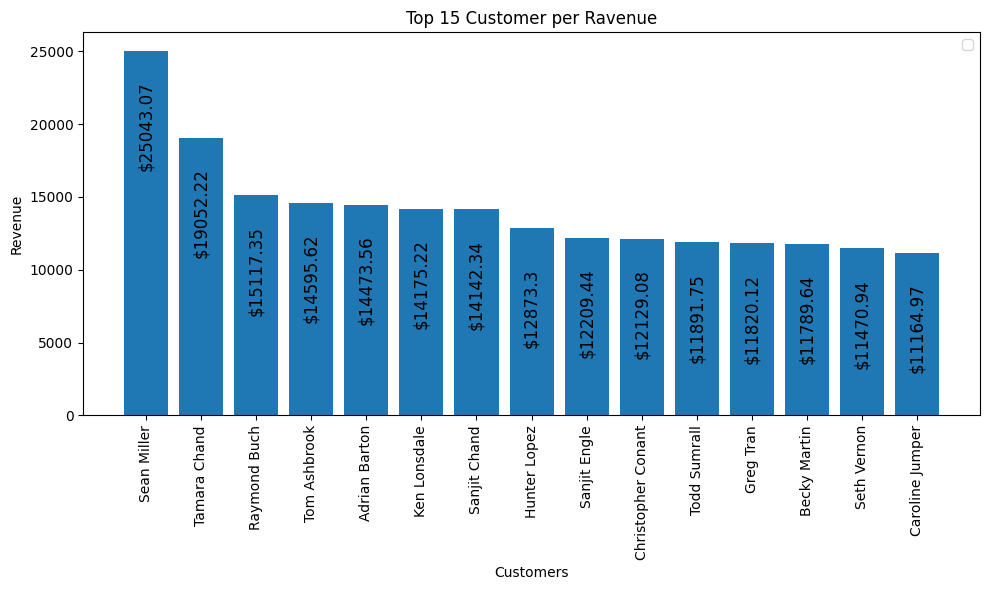

In [80]:
#plot the bar chart 
plt.figure(figsize=(10,6))
plt.bar(Top_15_customers['Customer Name'], Top_15_customers['Sales'])
plt.xlabel("Customers")
plt.ylabel("Revenue")
plt.xticks(rotation=90)
plt.title("Top 15 Customer per Ravenue")

#show ravenue value for each customers 
for k, v in Top_15_customers["Sales"].items():
    plt.text(k, v - 8000, '$' + str(v), fontsize=12, rotation=90, color='k', horizontalalignment='center')

plt.legend()
plt.tight_layout()
plt.show()

## Ravenue per segment

C:\Users\saram\AppData\Local\Temp\ipykernel_24508\2971621009.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  segment_sales = sales_df.groupby(['Segment']).sum().sort_values('Sales', ascending=False).head(15)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


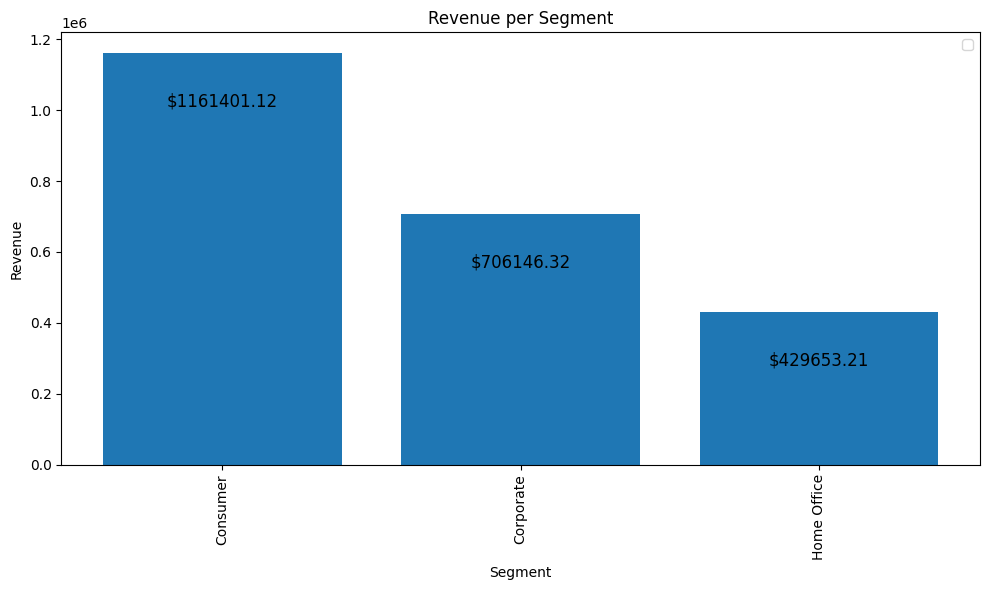

In [103]:
#Sort customer per sales
segment_sales = sales_df.groupby(['Segment']).sum().sort_values('Sales', ascending=False).head(15)
#make the sales number round 2 decimal 
segment_sales =segment_sales[['Sales']].round(2)
#reset index
segment_sales.reset_index(inplace=True)

plt.figure(figsize=(10,6))
plt.bar(segment_sales['Segment'], segment_sales['Sales'])
plt.xlabel("Segment")
plt.ylabel("Revenue")
plt.xticks(rotation=90)
plt.title("Revenue per Segment")

#show ravenue value for each Segment 
for k, v in segment_sales["Sales"].items():
    plt.text(k, v - 150000, '$' + str(v), fontsize=12, rotation=0, color='k', horizontalalignment='center')

plt.legend()
plt.tight_layout()
plt.show()

## Top States by ravenues 

We will plot the states that make the most profit for the company 

In [83]:
#Sort States per sales
Top_15_states = sales_df.groupby(['State']).sum().sort_values('Sales', ascending=False).head(15)
#make the sales number round 2 decimal 
Top_15_states =Top_15_states[['Sales']].round(2)
#reset index
Top_15_states.reset_index(inplace=True)

C:\Users\saram\AppData\Local\Temp\ipykernel_24508\2853422710.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Top_15_states = sales_df.groupby(['State']).sum().sort_values('Sales', ascending=False).head(15)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


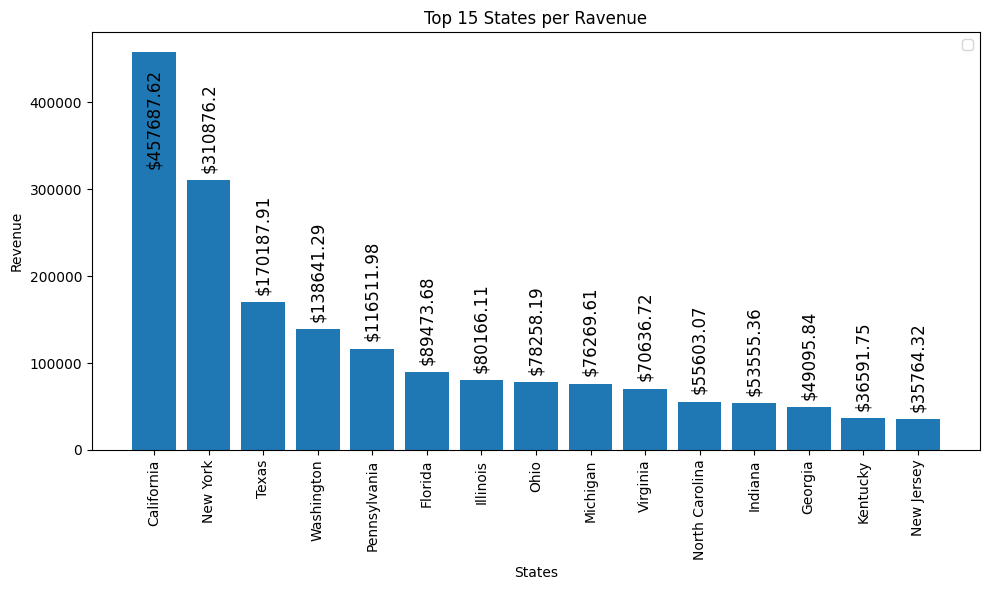

In [90]:
#plot the bar chart 
plt.figure(figsize=(10,6))
plt.bar(Top_15_states['State'], Top_15_states['Sales'])
plt.xlabel("States")
plt.ylabel("Revenue")
plt.xticks(rotation=90)
plt.title("Top 15 States per Ravenue")

#show ravenue value for each State 
for k, v in Top_15_states["Sales"].items():
    if v>400000:
        plt.text(k,v-130000,'$'+ str(v), fontsize=12,rotation=90,color='k', horizontalalignment='center')
    else:
        plt.text(k,v+13000,'$'+ str(v), fontsize=12,rotation=90,color='k', horizontalalignment='center')

plt.legend()
plt.tight_layout()
plt.show()

## Top Citis by Ravenue
We need to find which citis are generat hihest revenue

In [91]:
#Sort Cites per sales
Top_15_cities = sales_df.groupby(['City']).sum().sort_values('Sales', ascending=False).head(15)
#make the sales number round 2 decimal 
Top_15_cities =Top_15_cities[['Sales']].round(2)
#reset index
Top_15_cities.reset_index(inplace=True)

C:\Users\saram\AppData\Local\Temp\ipykernel_24508\695427314.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Top_15_cities = sales_df.groupby(['City']).sum().sort_values('Sales', ascending=False).head(15)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


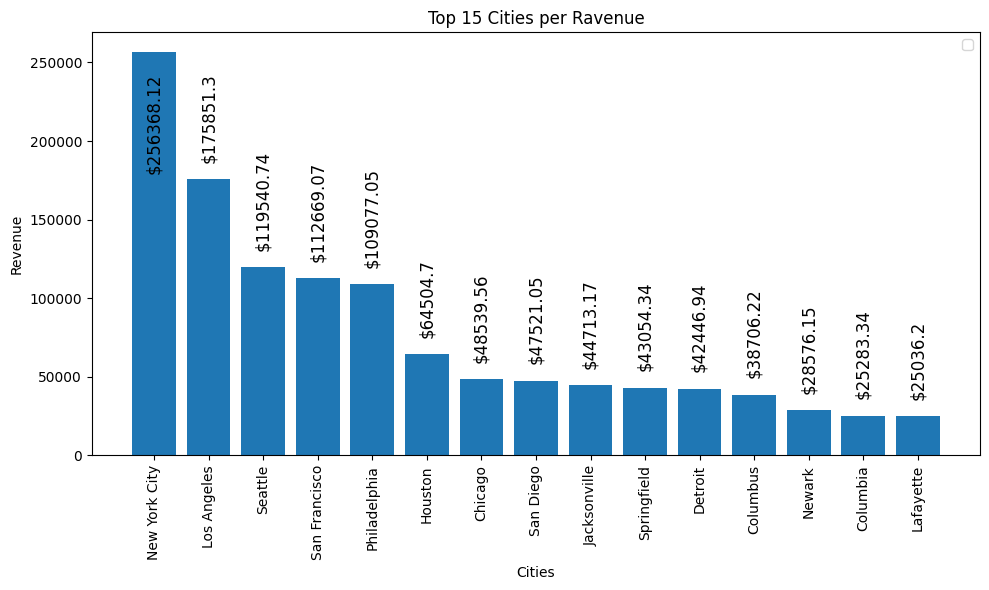

In [97]:
#plot the bar chart 
plt.figure(figsize=(10,6))
plt.bar(Top_15_cities['City'], Top_15_cities['Sales'])
plt.xlabel("Cities")
plt.ylabel("Revenue")
plt.xticks(rotation=90)
plt.title("Top 15 Cities per Ravenue")

#show ravenue value for each State 
for k, v in Top_15_cities["Sales"].items():
    if v>250000:
        plt.text(k,v-75000,'$'+ str(v), fontsize=12,rotation=90,color='k', horizontalalignment='center')
    else:
        plt.text(k,v+13000,'$'+ str(v), fontsize=12,rotation=90,color='k', horizontalalignment='center')

plt.legend()
plt.tight_layout()
plt.show()

## Revenue generated by the category 

In [104]:
#sort categories per sale
top_category=sales_df.groupby(['Category']).sum().sort_values('Sales', ascending=False)
top_category = top_category[['Sales']]
#reset index
top_category.reset_index(inplace=True)

C:\Users\saram\AppData\Local\Temp\ipykernel_24508\4122043770.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_category=sales_df.groupby(['Category']).sum().sort_values('Sales', ascending=False)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


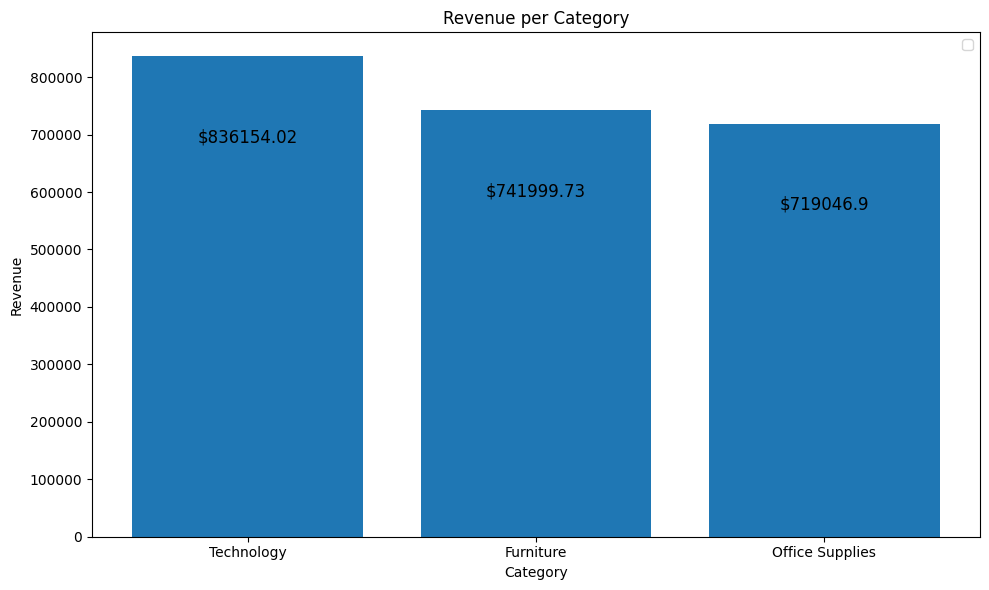

In [107]:
#plot 
plt.figure(figsize=(10,6))
plt.bar(top_category['Category'], top_category['Sales'])
plt.xlabel("Category")
plt.ylabel("Revenue")
plt.xticks(rotation=0)
plt.title("Revenue per Category")

#show ravenue value for each Category 
for k, v in top_category["Sales"].items():
    plt.text(k, v - 150000, '$' + str(v), fontsize=12, rotation=0, color='k', horizontalalignment='center')

plt.legend()
plt.tight_layout()
plt.show()

In [147]:
#total revenue
total_revenue_category = top_category['Sales'].sum()

print(f"Total Revenue from Category: ${total_revenue_category:,.2f}")


Total Revenue from Category: $2,297,200.65


The total revenue generated by all the categories is $2 297 200

## Top preforming products

Let's check which product generate most profit

In [109]:
# Sort products per sales
Top_10_products = sales_df.groupby(['Product Name']).sum().sort_values('Sales', ascending=False).head(10)

Top_10_products = Top_10_products[['Sales']].round(2)
#reset index
Top_10_products.reset_index(inplace=True)

C:\Users\saram\AppData\Local\Temp\ipykernel_24508\4009067750.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Top_10_products = sales_df.groupby(['Product Name']).sum().sort_values('Sales', ascending=False).head(10)


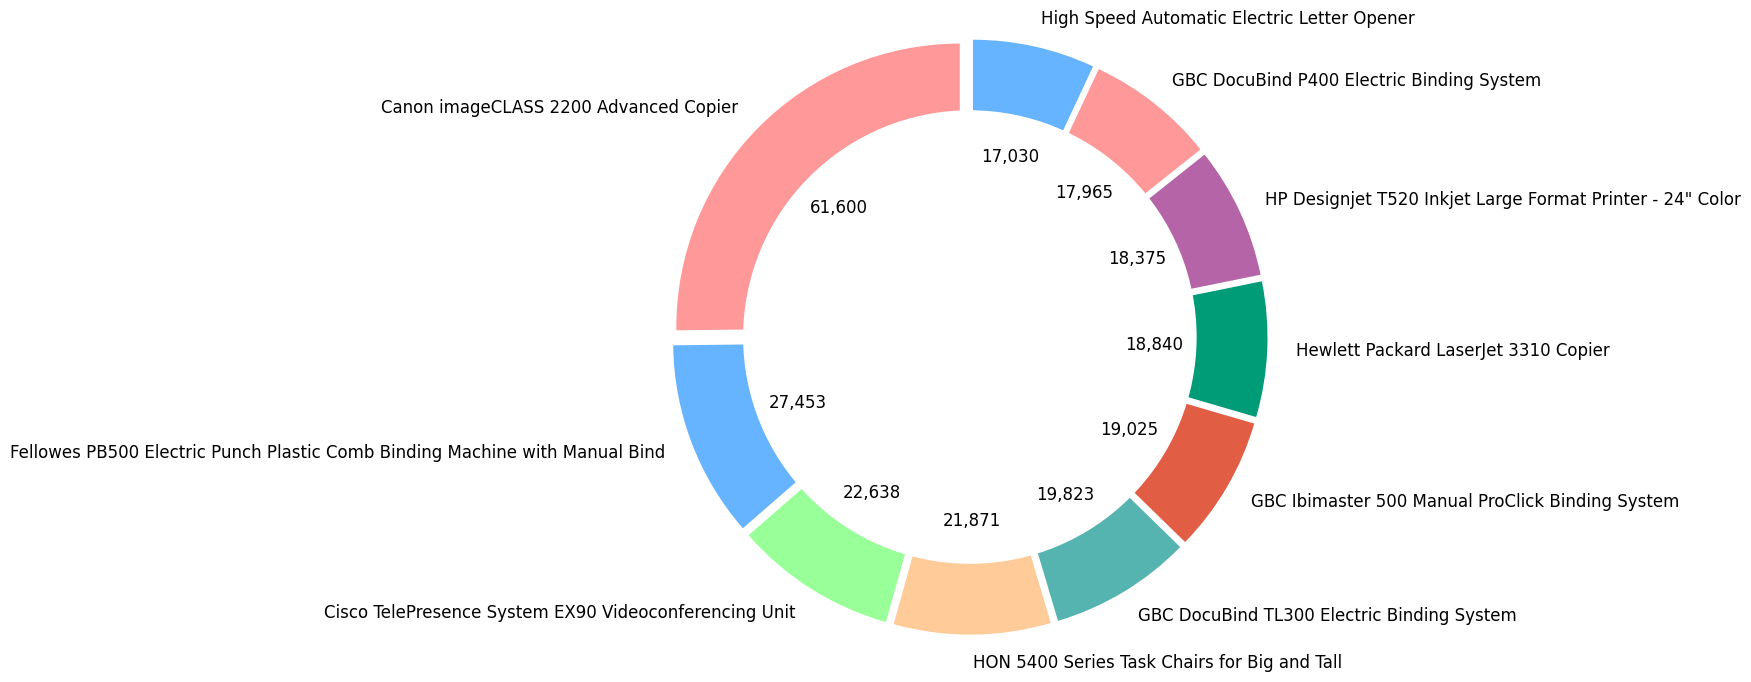

In [124]:
#plot
def autopct_format(values):
    def func(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return f'{val:,d}'
    return func

plt.rcParams["figure.figsize"] = (13, 7)
plt.rcParams['font.size'] = 12.0
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#55B4B0', '#E15D44', '#009B77', '#B565A7']
explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,0.05)

fig1, ax1 = plt.subplots()
ax1.pie(Top_10_products['Sales'], colors=colors, labels=Top_10_products['Product Name'], autopct=autopct_format(Top_10_products['Sales']), startangle=90, explode=explode)

centre_circle = plt.Circle((0, 0), 0.80, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')
plt.tight_layout()
plt.show()

In [146]:
#total revenue
total_revenue_products = Top_10_products['Sales'].sum()

print(f"Total Revenue from Products: ${total_revenue_products:,.2f}")


Total Revenue from Products: $244,620.18


## Underperforming Product

In [129]:
#average sales
average_sales = sales_df['Sales'].mean()

threshold = average_sales

underperfomring_products = sales_df[sales_df['Sales']< threshold]
sorted_underperforming = underperfomring_products.sort_values(by='Sales', ascending=True).head(20)

for index, row in sorted_underperforming.iterrows():
    print(f"Product: {row['Product Name']}, Total Sales: ${row['Sales']:,}")

Product: Hoover Replacement Belt for Commercial Guardsman Heavy-Duty Upright Vacuum, Total Sales: $0.44
Product: Acco Suede Grain Vinyl Round Ring Binder, Total Sales: $0.56
Product: Avery Durable Slant Ring Binders With Label Holder, Total Sales: $0.84
Product: Avery Round Ring Poly Binders, Total Sales: $0.85
Product: Acco 3-Hole Punch, Total Sales: $0.88
Product: Avery Non-Stick Binders, Total Sales: $0.9
Product: Avery Triangle Shaped Sheet Lifters, Black, 2/Pack, Total Sales: $0.98
Product: Maxell 4.7GB DVD-R 5/Pack, Total Sales: $0.99
Product: Acco Economy Flexible Poly Round Ring Binder, Total Sales: $1.04
Product: Wilson Jones Easy Flow II Sheet Lifters, Total Sales: $1.08
Product: Wilson Jones Easy Flow II Sheet Lifters, Total Sales: $1.08
Product: Wilson Jones Easy Flow II Sheet Lifters, Total Sales: $1.08
Product: Acco Suede Grain Vinyl Round Ring Binder, Total Sales: $1.11
Product: Avery Binder Labels, Total Sales: $1.17
Product: Avery Hidden Tab Dividers for Binding System

## Sub-Category

In [133]:
#sort sub-category per sales
Top_sub_category = sales_df.groupby(['Category', 'Sub-Category']).sum().sort_values('Sales', ascending=False).head(10)

Top_sub_category = Top_sub_category.sort_values('Category')

Top_sub_category.reset_index(inplace=True)

C:\Users\saram\AppData\Local\Temp\ipykernel_24508\3804240465.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Top_sub_category = sales_df.groupby(['Category', 'Sub-Category']).sum().sort_values('Sales', ascending=False).head(10)


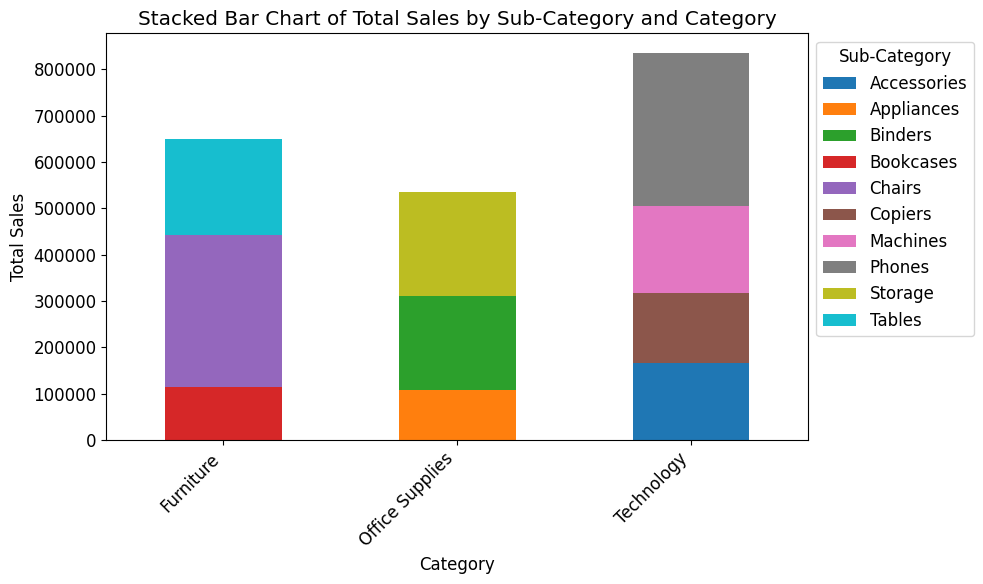

In [138]:
#plot
stacked_data = Top_sub_category.pivot(index='Category', columns='Sub-Category', values='Sales')

stacked_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Stacked Bar Chart of Total Sales by Sub-Category and Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sub-Category', bbox_to_anchor=(1, 1)) 
plt.tight_layout()
plt.show()

We can see that Phones generated the hihest revenue. 

## Shipp mode

In [139]:
#shiping mode and sales
shiping_mode = sales_df.groupby(['Ship Mode']).sum().sort_values('Sales', ascending=False)
shiping_mode = shiping_mode[['Sales']]
#reset index
shiping_mode.reset_index(inplace=True)

C:\Users\saram\AppData\Local\Temp\ipykernel_24508\3994904166.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  shiping_mode = sales_df.groupby(['Ship Mode']).sum().sort_values('Sales', ascending=False)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


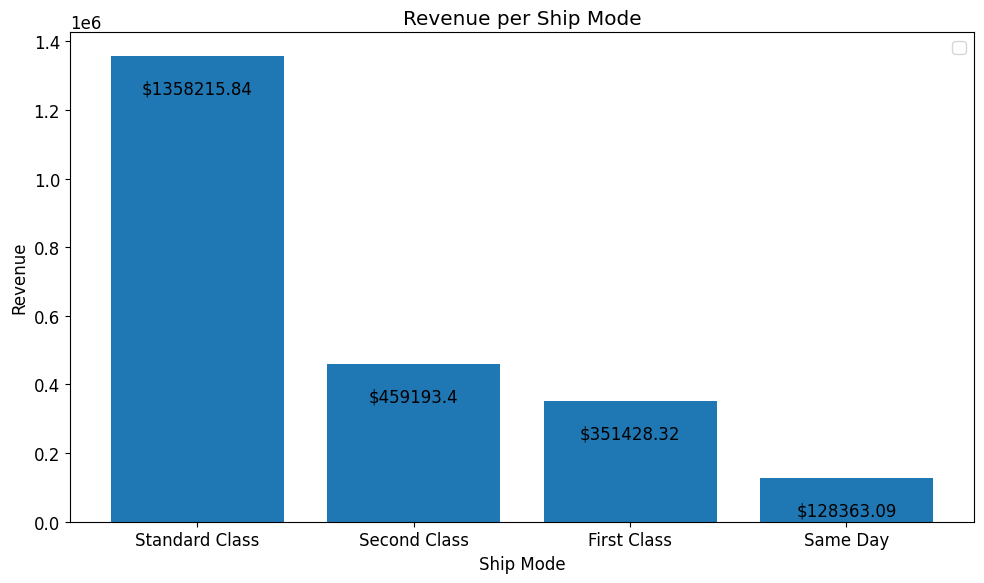

In [142]:
#plot
plt.figure(figsize=(10,6))
plt.bar(shiping_mode['Ship Mode'], shiping_mode['Sales'])
plt.xlabel("Ship Mode")
plt.ylabel("Revenue")
plt.xticks(rotation=0)
plt.title("Revenue per Ship Mode")

#show ravenue value for each Ship Mode 
for k, v in shiping_mode["Sales"].items():
    plt.text(k, v - 110000, '$' + str(v), fontsize=12, rotation=0, color='k', horizontalalignment='center')

plt.legend()
plt.tight_layout()
plt.show()

Standard Class generated the biggest reveneu.

In [145]:
total_revenue_ship = shiping_mode['Sales'].sum()
print(f"Total Revenue from Shipping Modes: ${total_revenue_ship:,.2f}")


Total Revenue from Shipping Modes: $2,297,200.65


## HeatMap

C:\Users\saram\AppData\Local\Temp\ipykernel_24508\578732335.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(sales_df.corr(),cbar=False,cmap='BuGn',annot=True)


<AxesSubplot: >

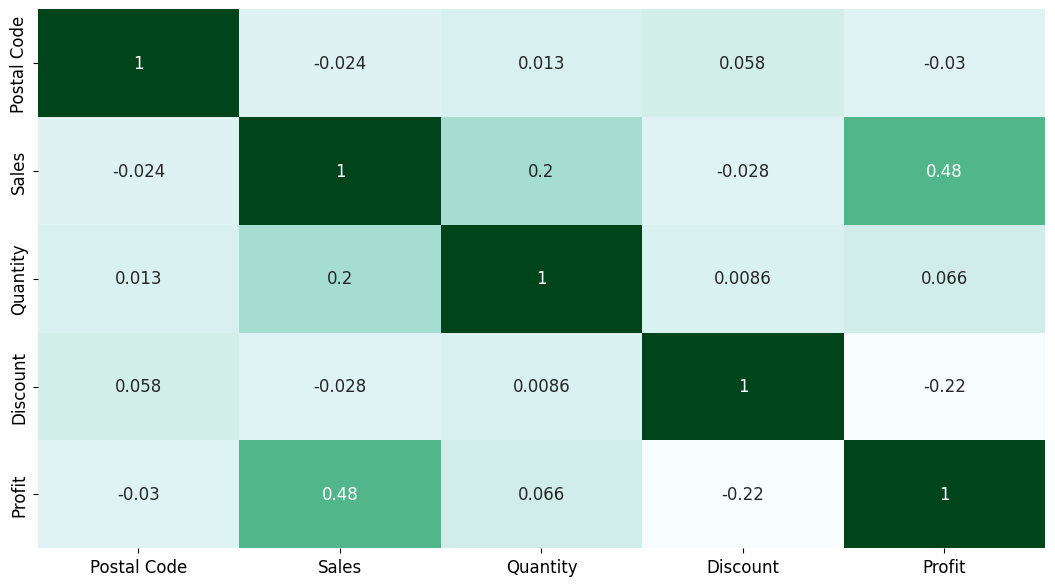

In [155]:
sns.heatmap(sales_df.corr(),cbar=False,cmap='BuGn',annot=True)


The Corelation between the Discount and Sales is 0.2, this indicate a postive correlation, if one variable increases the other tends to increase as well, but the correlation is not very strong. 
The corleation betwwen Discount and Sales indicate a weak negative correlation.
The corelation between the Profit and Sales is moderate positive correlation.

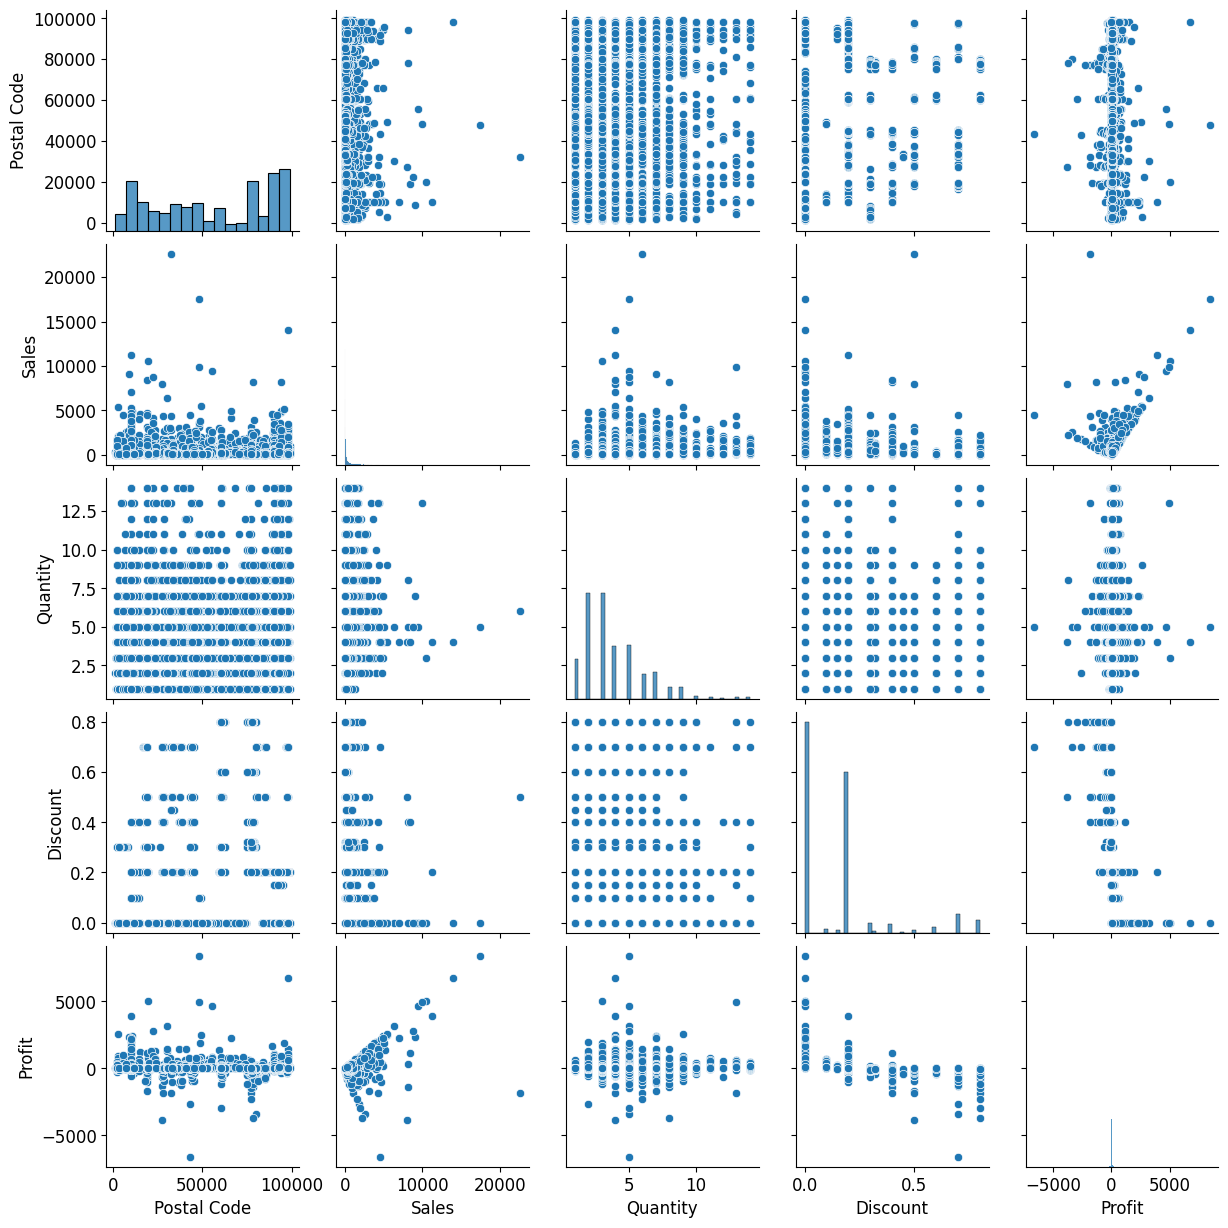

In [156]:
sns.pairplot(sales_df)


In [196]:
#save the data frame
sales_df.to_csv('Superstore.csv', index=False)